In [7]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
import pandas as pd
import numpy as np
from datetime import datetime
import time

In [8]:
df = pd.read_csv('./all_cf4_sni1_sample.csv', delimiter='|')
df = df.rename(columns=lambda x: x.strip())
df = df.set_index('PGC')
df = df.drop(columns=['1PGC'])
print(len(df))
df.head()

1009


SNIa  IDT17g   Vcmb   Vmod  DM_av   eDM  DM_pantheonplus  \
PGC                                                               
250  2006sr       0   6914   7042  35.04  0.13            35.07   
282  2008hj       0  10921  11235  36.03  0.11            35.98   
415  2003it       0   7165   7301  35.12  0.14            35.14   
465  2000dg       0  11092  11415  36.05  0.20              NaN   
515  2002hw       0   4796   4857  34.28  0.15              NaN   

     eDM_pantheonplus  DM_scolnic  eDM_scolnic  ...  DM_twins  eDM_twins  \
PGC                                             ...                        
250              0.25       35.03         0.20  ...       NaN        NaN   
282              0.24       36.00         0.18  ...       NaN        NaN   
415              0.25       35.12         0.21  ...       NaN        NaN   
465               NaN         NaN          NaN  ...       NaN        NaN   
515               NaN         NaN          NaN  ...       NaN        NaN   

     DM_avelino  eDM_avelino      RA       DE      glon     glat       sgl  \
PGC                                                                          
250         NaN          NaN  0.8958  23.2008  108.8693 -38.3606  316.3211   
282       35.97         0.12  1.0064 -11.1742   85.7160 -70.5385  282.0792   
415         NaN          NaN  1.4517  27.4491  110.6597 -34.3329  320.8087   
465         NaN          NaN  1.5588   8.8878  104.4513 -52.3545  301.9054   
515         NaN          NaN  1.7062   8.6285  104.5597 -52.6445  301.6830   

         sgb  
PGC           
250  17.6720  
282   8.9703  
415  17.8681  
465  14.0485  
515  13.8439  

[5 rows x 42 columns]

In [9]:
catalogs = []
catalogs = ["sh0es"]
catalogs += ["pantheonplus"]
catalogs += ["scolnic"]
catalogs += ["csp1"]
catalogs += ["ganesh"]
catalogs += ["rest"]
catalogs += ["amanullah"]
catalogs += ["jha"]
catalogs += ["prieto"]
catalogs += ["hicken"]
catalogs += ["folatelli"]
catalogs += ["walker"]
catalogs += ["stahl"]
catalogs += ["twins"]
catalogs += ["avelino"]

In [10]:
for cat in catalogs:
    df["eDM_"+cat][df["DM_"+cat]==0] = np.nan
    df["DM_"+cat][df["DM_"+cat]==0] = np.nan
    df['PGC1_'+cat] = df.index
    df['PGC1_'+cat][df["DM_"+cat].isna()] = np.nan
    df['Vcmb_'+cat] = df["Vcmb"]
    df['Vcmb_'+cat][df["DM_"+cat].isna()] = np.nan
df.head()

<ipython-input-10-4b160e5ccce7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eDM_"+cat][df["DM_"+cat]==0] = np.nan
<ipython-input-10-4b160e5ccce7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DM_"+cat][df["DM_"+cat]==0] = np.nan
<ipython-input-10-4b160e5ccce7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PGC1_'+cat][df["DM_"+cat].isna()] = np.nan
<ipython-input-10-4b160e5ccce7>:7: SettingWithCopyWarning: 
A valu

SNIa  IDT17g   Vcmb   Vmod  DM_av   eDM  DM_pantheonplus  \
PGC                                                               
250  2006sr       0   6914   7042  35.04  0.13            35.07   
282  2008hj       0  10921  11235  36.03  0.11            35.98   
415  2003it       0   7165   7301  35.12  0.14            35.14   
465  2000dg       0  11092  11415  36.05  0.20              NaN   
515  2002hw       0   4796   4857  34.28  0.15              NaN   

     eDM_pantheonplus  DM_scolnic  eDM_scolnic  ...  PGC1_folatelli  \
PGC                                             ...                   
250              0.25       35.03         0.20  ...             NaN   
282              0.24       36.00         0.18  ...             NaN   
415              0.25       35.12         0.21  ...             NaN   
465               NaN         NaN          NaN  ...             NaN   
515               NaN         NaN          NaN  ...             NaN   

     Vcmb_folatelli  PGC1_walker  Vcmb_walker  PGC1_stahl  Vcmb_stahl  \
PGC                                                                     
250             NaN          NaN          NaN       250.0      6914.0   
282             NaN          NaN          NaN       282.0     10921.0   
415             NaN          NaN          NaN       415.0      7165.0   
465             NaN          NaN          NaN       465.0     11092.0   
515             NaN          NaN          NaN       515.0      4796.0   

     PGC1_twins  Vcmb_twins  PGC1_avelino  Vcmb_avelino  
PGC                                                      
250         NaN         NaN           NaN           NaN  
282         NaN         NaN         282.0       10921.0  
415         NaN         NaN           NaN           NaN  
465         NaN         NaN           NaN           NaN  
515         NaN         NaN           NaN           NaN  

[5 rows x 72 columns]

In [11]:
df.describe()

IDT17g          Vcmb          Vmod        DM_av         eDM  \
count   1009.000000   1009.000000   1009.000000  1009.000000  1009.00000   
mean   11615.628345  10398.088206  10796.797820    35.382834     0.17109   
std    23960.522060   6692.513754   7160.548897     1.623731     0.09650   
min        0.000000    240.000000    240.000000    27.600000     0.08000   
25%        0.000000   5240.000000   5313.000000    34.430000     0.13000   
50%        0.000000   8817.000000   9022.000000    35.520000     0.15000   
75%     4085.000000  14330.000000  14868.000000    36.550000     0.18000   
max    88355.000000  32575.000000  35299.000000    38.600000     1.91000   

       DM_pantheonplus  eDM_pantheonplus  DM_scolnic  eDM_scolnic     DM_csp1  \
count       589.000000        589.000000  514.000000   514.000000  137.000000   
mean         35.330051          0.274448   35.649747     0.186167   34.521460   
std           1.544109          0.246346    1.347243     0.044860    1.812122   
min          29.160000          0.230000   31.990000     0.150000   29.150000   
25%          34.400000          0.240000   34.762500     0.170000   33.180000   
50%          35.460000          0.250000   35.655000     0.180000   34.720000   
75%          36.380000          0.260000   36.577500     0.200000   35.760000   
max          38.550000          5.180000   38.600000     0.770000   37.870000   

       ...  PGC1_folatelli  Vcmb_folatelli   PGC1_walker   Vcmb_walker  \
count  ...    2.800000e+01       28.000000  2.900000e+01     29.000000   
mean   ...    3.591846e+05     9083.392857  1.955168e+06  16947.206897   
std    ...    8.607411e+05     5529.038215  2.666047e+06   7746.389622   
min    ...    7.299000e+03     1888.000000  1.700600e+04   3093.000000   
25%    ...    2.321950e+04     4490.250000  6.072540e+05   9694.000000   
50%    ...    4.623600e+04     8193.000000  9.626320e+05  17219.000000   
75%    ...    7.806050e+04    10955.250000  1.561674e+06  21628.000000   
max    ...    3.333560e+06    24055.000000  9.003164e+06  29819.000000   

         PGC1_stahl    Vcmb_stahl    PGC1_twins    Vcmb_twins  PGC1_avelino  \
count  6.690000e+02    669.000000  1.330000e+02    133.000000  8.900000e+01   
mean   7.123585e+05   7838.711510  2.978201e+06  15096.842105  2.199325e+05   
std    1.633453e+06   4199.126581  3.089670e+06   5642.327160  8.601620e+05   
min    2.500000e+02    240.000000  3.444000e+03   6232.000000  2.820000e+02   
25%    2.637700e+04   4619.000000  1.652550e+05   9954.000000  2.002000e+04   
50%    5.066200e+04   7417.000000  1.722411e+06  15381.000000  3.814600e+04   
75%    9.401200e+04  10096.000000  4.689872e+06  20089.000000  6.238100e+04   
max    9.003257e+06  19442.000000  9.003288e+06  27960.000000  5.069093e+06   

       Vcmb_avelino  
count     89.000000  
mean    5814.853933  
std     2847.222433  
min      851.000000  
25%     3729.000000  
50%     5501.000000  
75%     7959.000000  
max    11605.000000  

[8 rows x 71 columns]

(array([  0., 578.,   9.,   0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8]),
 <a list of 4 Patch objects>)

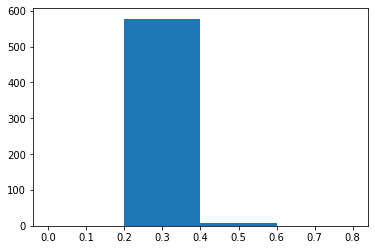

In [12]:
plt.hist(df.eDM_pantheonplus, bins=np.arange(0,1,0.2))

pantheonplus -0.030000000000001137 0.05674961874849394 441


(array([  3.,  20., 281., 128.,   7.,   1.,   0.,   0.,   0.,   1.]),
 array([-0.28 , -0.191, -0.102, -0.013,  0.076,  0.165,  0.254,  0.343,
         0.432,  0.521,  0.61 ]),
 <a list of 10 Patch objects>)

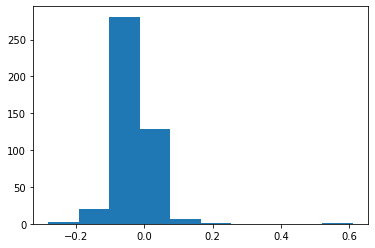

In [13]:
col = 'pantheonplus'

col0 = 'scolnic'

# for col in catalogs[1:]:
df0 = df[["DM_"+col0, "DM_"+col]].dropna()

delta = df0["DM_"+col0] - df0["DM_"+col]

print(col, np.median(delta), np.std(delta), len(delta))

plt.hist(delta.values)

In [14]:
len(delta)

441

In [15]:
ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat, "DM_"+cat, "eDM_"+cat, "Vcmb_"+cat]

df = df[ss]

ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat]   
df['pgc1'] = df[ss].median(axis=1)
df = df[~df['pgc1'].isna()]

print(len(df))

df.head()

1009


PGC1_sh0es  DM_sh0es  eDM_sh0es  Vcmb_sh0es  PGC1_pantheonplus  \
PGC                                                                   
250       250.0     35.05       0.13      6914.0              250.0   
282       282.0     35.96       0.11     10921.0              282.0   
415       415.0     35.13       0.14      7165.0              415.0   
465       465.0     36.13       0.20     11092.0                NaN   
515         NaN       NaN        NaN         NaN                NaN   

     DM_pantheonplus  eDM_pantheonplus  Vcmb_pantheonplus  PGC1_scolnic  \
PGC                                                                       
250            35.07              0.25             6914.0         250.0   
282            35.98              0.24            10921.0         282.0   
415            35.14              0.25             7165.0         415.0   
465              NaN               NaN                NaN           NaN   
515              NaN               NaN                NaN           NaN   

     DM_scolnic  ...  Vcmb_stahl  PGC1_twins  DM_twins  eDM_twins  Vcmb_twins  \
PGC              ...                                                            
250       35.03  ...      6914.0         NaN       NaN        NaN         NaN   
282       36.00  ...     10921.0         NaN       NaN        NaN         NaN   
415       35.12  ...      7165.0         NaN       NaN        NaN         NaN   
465         NaN  ...     11092.0         NaN       NaN        NaN         NaN   
515         NaN  ...      4796.0         NaN       NaN        NaN         NaN   

     PGC1_avelino  DM_avelino  eDM_avelino  Vcmb_avelino   pgc1  
PGC                                                              
250           NaN         NaN          NaN           NaN  250.0  
282         282.0       35.97         0.12       10921.0  282.0  
415           NaN         NaN          NaN           NaN  415.0  
465           NaN         NaN          NaN           NaN  465.0  
515           NaN         NaN          NaN           NaN  515.0  

[5 rows x 61 columns]

In [16]:
ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat]   
df['pgc1'] = df[ss].median(axis=1)
df = df[~df['pgc1'].isna()]



d = np.zeros(len(catalogs))
myDict = {}
for i, cat in enumerate(catalogs):
    myDict[cat] = d[i]

for cat in catalogs:
    df['w_'+cat] = 1./df['eDM_'+cat]**2
    df['xw_'+cat] = (df['DM_'+cat]+myDict[cat])*df['w_'+cat]

  
dg = df.groupby("pgc1").agg(["sum", "count"])

for cat in catalogs:
    dg['eDMg_'+cat] = np.sqrt(1./dg['w_'+cat]['sum'])
    dg['DMg_'+cat] = (dg['xw_'+cat]['sum'])/dg['w_'+cat]['sum']

ss = []
for cat in catalogs:
    dg['N_'+cat] = dg["DM_"+cat]['count']
    ss += ['N_'+cat, "DMg_"+cat, "eDMg_"+cat]

dg = dg[ss]
dg.replace([np.inf, -np.inf], np.nan, inplace=True)

dg.index = dg.index.astype('int')


ss = ['DMg_'+cat for cat in catalogs]+['eDMg_'+cat for cat in catalogs]
dg_ = dg[ss]

for cat in catalogs:
        dg_['gw_'+cat] = 1./dg_['eDMg_'+cat]**2

<ipython-input-16-d4bf08deca41>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg_['gw_'+cat] = 1./dg_['eDMg_'+cat]**2


In [17]:
# dg = df.groupby("pgc1").agg(["sum", "count"])
dg

N_sh0es DMg_sh0es eDMg_sh0es N_pantheonplus DMg_pantheonplus  \
                                                                       
pgc1                                                                   
250           1     35.05       0.13              1            35.07   
282           1     35.96       0.11              1            35.98   
415           1     35.13       0.14              1            35.14   
465           1     36.13       0.20              0              NaN   
515           0       NaN        NaN              0              NaN   
...         ...       ...        ...            ...              ...   
9003283       0       NaN        NaN              0              NaN   
9003285       0       NaN        NaN              0              NaN   
9003286       0       NaN        NaN              0              NaN   
9003287       1     37.65       0.11              1            37.69   
9003288       0       NaN        NaN              0              NaN   

        eDMg_pantheonplus N_scolnic DMg_scolnic eDMg_scolnic N_csp1  ...  \
                                                                     ...   
pgc1                                                                 ...   
250                  0.25         1       35.03         0.20      0  ...   
282                  0.24         1       36.00         0.18      1  ...   
415                  0.25         1       35.12         0.21      0  ...   
465                   NaN         0         NaN          NaN      0  ...   
515                   NaN         0         NaN          NaN      0  ...   
...                   ...       ...         ...          ...    ...  ...   
9003283               NaN         0         NaN          NaN      0  ...   
9003285               NaN         0         NaN          NaN      0  ...   
9003286               NaN         0         NaN          NaN      0  ...   
9003287              0.23         1       37.67         0.18      0  ...   
9003288               NaN         0         NaN          NaN      0  ...   

        eDMg_walker N_stahl DMg_stahl eDMg_stahl N_twins DMg_twins eDMg_twins  \
                                                                                
pgc1                                                                            
250             NaN       1     35.10       0.17       0       NaN        NaN   
282             NaN       1     36.12       0.13       0       NaN        NaN   
415             NaN       1     35.10       0.18       0       NaN        NaN   
465             NaN       1     35.99       0.22       0       NaN        NaN   
515             NaN       1     34.10       0.19       0       NaN        NaN   
...             ...     ...       ...        ...     ...       ...        ...   
9003283         NaN       0       NaN        NaN       1     35.05        0.1   
9003285         NaN       0       NaN        NaN       1     36.98        0.1   
9003286         NaN       0       NaN        NaN       1     37.95        0.1   
9003287         NaN       0       NaN        NaN       0       NaN        NaN   
9003288         NaN       0       NaN        NaN       1     37.17        0.1   

        N_avelino DMg_avelino eDMg_avelino  
                                            
pgc1                                        
250             0         NaN          NaN  
282             1       35.97         0.12  
415             0         NaN          NaN  
465             0         NaN          NaN  
515             0         NaN          NaN  
...           ...         ...          ...  
9003283         0         NaN          NaN  
9003285         0         NaN          NaN  
9003286         0         NaN          NaN  
9003287         0         NaN          NaN  
9003288         0         NaN          NaN  

[1009 rows x 45 columns]

In [18]:
for col in catalogs[1:]:
    df0 = dg[["DMg_sh0es", "DMg_"+col]].dropna()

    delta = df0.DMg_sh0es - df0["DMg_"+col]

    print(col, np.median(delta))

pantheonplus -0.03999999999999915
scolnic -0.00999999999999801
csp1 -0.030000000000001137
ganesh 0.0
rest 0.00999999999999801
amanullah 0.0
jha -0.05999999999999872
prieto -0.019999999999999574
hicken 0.00999999999999801
folatelli 0.01999999999999602
walker -0.120000000000001
stahl -0.00999999999999801
twins -0.020000000000003126
avelino 0.05000000000000426


In [19]:
def GfastChi2(dg, theta=None):
    
    if theta is None:
        d = np.zeros(len(catalogs))
    else:
        theta = np.asarray(theta)
        d = np.concatenate((np.zeros(1), theta[1:]))
    
    myDict = {}
    for i, cat in enumerate(catalogs):
        myDict[cat] = d[i]

    ###########################################################
        
    for cat in catalogs:
#         dg['gw_'+cat] = 1./dg['eDMg_'+cat]**2
        dg['gxw_'+cat] = (dg['DMg_'+cat]+myDict[cat])*dg['gw_'+cat]


    sx = ['gxw_'+cat for cat in catalogs]
    sw = ['gw_'+cat for cat in catalogs]
    
    ERRave2 = 1./dg[sw].sum(axis=1)
    ave = dg[sx].sum(axis=1)*ERRave2
    
    myDict[catalogs[0]] = theta[0]
    for cat in catalogs:
        dg['gxi2_'+cat] = ((dg['DMg_'+cat]+myDict[cat]-ave)**2)/(dg_['eDMg_'+cat]**2+ERRave2)


    sxi = ['gxi2_'+cat for cat in catalogs]    
    XI2 = dg[sxi].sum(axis=1)

    return XI2.sum()

In [20]:
t1 =  datetime.now()

print(GfastChi2(dg_, theta=range(len(catalogs))))

###########################################
t2 =  datetime.now()
print("Execution time:")
print(t2-t1)

1743218.3431866565
Execution time:
0:00:00.077034


In [21]:
dg.head()

N_sh0es DMg_sh0es eDMg_sh0es N_pantheonplus DMg_pantheonplus  \
                                                                    
pgc1                                                                
250        1     35.05       0.13              1            35.07   
282        1     35.96       0.11              1            35.98   
415        1     35.13       0.14              1            35.14   
465        1     36.13       0.20              0              NaN   
515        0       NaN        NaN              0              NaN   

     eDMg_pantheonplus N_scolnic DMg_scolnic eDMg_scolnic N_csp1  ...  \
                                                                  ...   
pgc1                                                              ...   
250               0.25         1       35.03         0.20      0  ...   
282               0.24         1       36.00         0.18      1  ...   
415               0.25         1       35.12         0.21      0  ...   
465                NaN         0         NaN          NaN      0  ...   
515                NaN         0         NaN          NaN      0  ...   

     eDMg_walker N_stahl DMg_stahl eDMg_stahl N_twins DMg_twins eDMg_twins  \
                                                                             
pgc1                                                                         
250          NaN       1     35.10       0.17       0       NaN        NaN   
282          NaN       1     36.12       0.13       0       NaN        NaN   
415          NaN       1     35.10       0.18       0       NaN        NaN   
465          NaN       1     35.99       0.22       0       NaN        NaN   
515          NaN       1     34.10       0.19       0       NaN        NaN   

     N_avelino DMg_avelino eDMg_avelino  
                                         
pgc1                                     
250          0         NaN          NaN  
282          1       35.97         0.12  
415          0         NaN          NaN  
465          0         NaN          NaN  
515          0         NaN          NaN  

[5 rows x 45 columns]

In [22]:
df

PGC1_sh0es  DM_sh0es  eDM_sh0es  Vcmb_sh0es  PGC1_pantheonplus  \
PGC                                                                       
250           250.0     35.05       0.13      6914.0              250.0   
282           282.0     35.96       0.11     10921.0              282.0   
415           415.0     35.13       0.14      7165.0              415.0   
465           465.0     36.13       0.20     11092.0                NaN   
515             NaN       NaN        NaN         NaN                NaN   
...             ...       ...        ...         ...                ...   
9003283         NaN       NaN        NaN         NaN                NaN   
9003285         NaN       NaN        NaN         NaN                NaN   
9003286         NaN       NaN        NaN         NaN                NaN   
9003287   9003287.0     37.65       0.11     23881.0          9003287.0   
9003288         NaN       NaN        NaN         NaN                NaN   

         DM_pantheonplus  eDM_pantheonplus  Vcmb_pantheonplus  PGC1_scolnic  \
PGC                                                                           
250                35.07              0.25             6914.0         250.0   
282                35.98              0.24            10921.0         282.0   
415                35.14              0.25             7165.0         415.0   
465                  NaN               NaN                NaN           NaN   
515                  NaN               NaN                NaN           NaN   
...                  ...               ...                ...           ...   
9003283              NaN               NaN                NaN           NaN   
9003285              NaN               NaN                NaN           NaN   
9003286              NaN               NaN                NaN           NaN   
9003287            37.69              0.23            23881.0     9003287.0   
9003288              NaN               NaN                NaN           NaN   

         DM_scolnic  ...  w_folatelli  xw_folatelli  w_walker  xw_walker  \
PGC                  ...                                                   
250           35.03  ...          NaN           NaN       NaN        NaN   
282           36.00  ...          NaN           NaN       NaN        NaN   
415           35.12  ...          NaN           NaN       NaN        NaN   
465             NaN  ...          NaN           NaN       NaN        NaN   
515             NaN  ...          NaN           NaN       NaN        NaN   
...             ...  ...          ...           ...       ...        ...   
9003283         NaN  ...          NaN           NaN       NaN        NaN   
9003285         NaN  ...          NaN           NaN       NaN        NaN   
9003286         NaN  ...          NaN           NaN       NaN        NaN   
9003287       37.67  ...          NaN           NaN       NaN        NaN   
9003288         NaN  ...          NaN           NaN       NaN        NaN   

           w_stahl     xw_stahl  w_twins  xw_twins  w_avelino   xw_avelino  
PGC                                                                         
250      34.602076  1214.532872      NaN       NaN        NaN          NaN  
282      59.171598  2137.278107      NaN       NaN  69.444444  2497.916667  
415      30.864198  1083.333333      NaN       NaN        NaN          NaN  
465      20.661157   743.595041      NaN       NaN        NaN          NaN  
515      27.700831   944.598338      NaN       NaN        NaN          NaN  
...            ...          ...      ...       ...        ...          ...  
9003283        NaN          NaN    100.0    3505.0        NaN          NaN  
9003285        NaN          NaN    100.0    3698.0        NaN          NaN  
9003286        NaN          NaN    100.0    3795.0        NaN          NaN  
9003287        NaN          NaN      NaN       NaN        NaN          NaN  
9003288        NaN          NaN    100.0    3717.0        NaN          NaN  

[1009 rows x 9

In [23]:
len(dg_)

1009

In [24]:
dg_.head()

DMg_sh0es DMg_pantheonplus DMg_scolnic DMg_csp1 DMg_ganesh DMg_rest  \
                                                                           
pgc1                                                                       
250      35.05            35.07       35.03      NaN      35.05    35.05   
282      35.96            35.98       36.00    36.15        NaN    36.07   
415      35.13            35.14       35.12      NaN        NaN    35.09   
465      36.13              NaN         NaN      NaN      36.00      NaN   
515        NaN              NaN         NaN      NaN      34.23      NaN   

     DMg_amanullah DMg_jha DMg_prieto DMg_hicken  ...  gxi2_rest  \
                                                  ...              
pgc1                                              ...              
250          35.04     NaN        NaN      35.04  ...   0.065469   
282            NaN     NaN        NaN        NaN  ...  19.925056   
415          35.14     NaN        NaN      35.20  ...   0.482904   
465            NaN     NaN        NaN        NaN  ...        NaN   
515          34.40     NaN        NaN      34.38  ...        NaN   

     gxi2_amanullah gxi2_jha gxi2_prieto gxi2_hicken gxi2_folatelli  \
                                                                      
pgc1                                                                  
250       19.257528      NaN         NaN  613.761473            NaN   
282             NaN      NaN         NaN         NaN            NaN   
415       12.456650      NaN         NaN  565.955549            NaN   
465             NaN      NaN         NaN         NaN            NaN   
515       79.757698      NaN         NaN    7.660517            NaN   

     gxi2_walker   gxi2_stahl gxi2_twins gxi2_avelino  
                                                       
pgc1                                                   
250          NaN  1526.356572        NaN          NaN  
282          NaN  1710.537060        NaN  3381.211896  
415          NaN  1253.044800        NaN          NaN  
465          NaN   742.043605        NaN          NaN  
515          NaN   225.858463        NaN          NaN  

[5 rows x 75 columns]

In [25]:
for col in catalogs[1:]:
    df0 = df[["DM_sh0es", "DM_"+col]].dropna()

    delta = df0.DM_sh0es - df0["DM_"+col]

    print(col, np.median(delta))

pantheonplus -0.03999999999999915
scolnic -0.00999999999999801
csp1 -0.02999999999999936
ganesh 0.0
rest 0.00999999999999801
amanullah 0.0
jha -0.05999999999999872
prieto -0.019999999999999574
hicken 0.00999999999999801
folatelli 0.01999999999999602
walker -0.120000000000001
stahl -0.00999999999999801
twins -0.020000000000003126
avelino 0.05000000000000426


In [26]:
def lnlike(theta):
    
    xi2 = GfastChi2(dg_, theta=theta)
    
    return -0.5*xi2


def lnprior(theta):
    
    return 0.0


def lnprob(theta):
    
    lp = lnprior(theta)
    if not np.isfinite(lp) :
        return -np.inf    
    return lp + lnlike(theta)

In [27]:
t1 =  datetime.now()
###########################################

ndim, nwalkers = len(catalogs), 128 # 128

p0 = [np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

sampler.reset()
sampler.run_mcmc(p0, 5000) # 5000 for 8 hours
samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))

theta = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                            zip(*np.percentile(samples, 
                            [16, 50, 84],
                            axis=0)))



Execution time:
8:38:15.767600


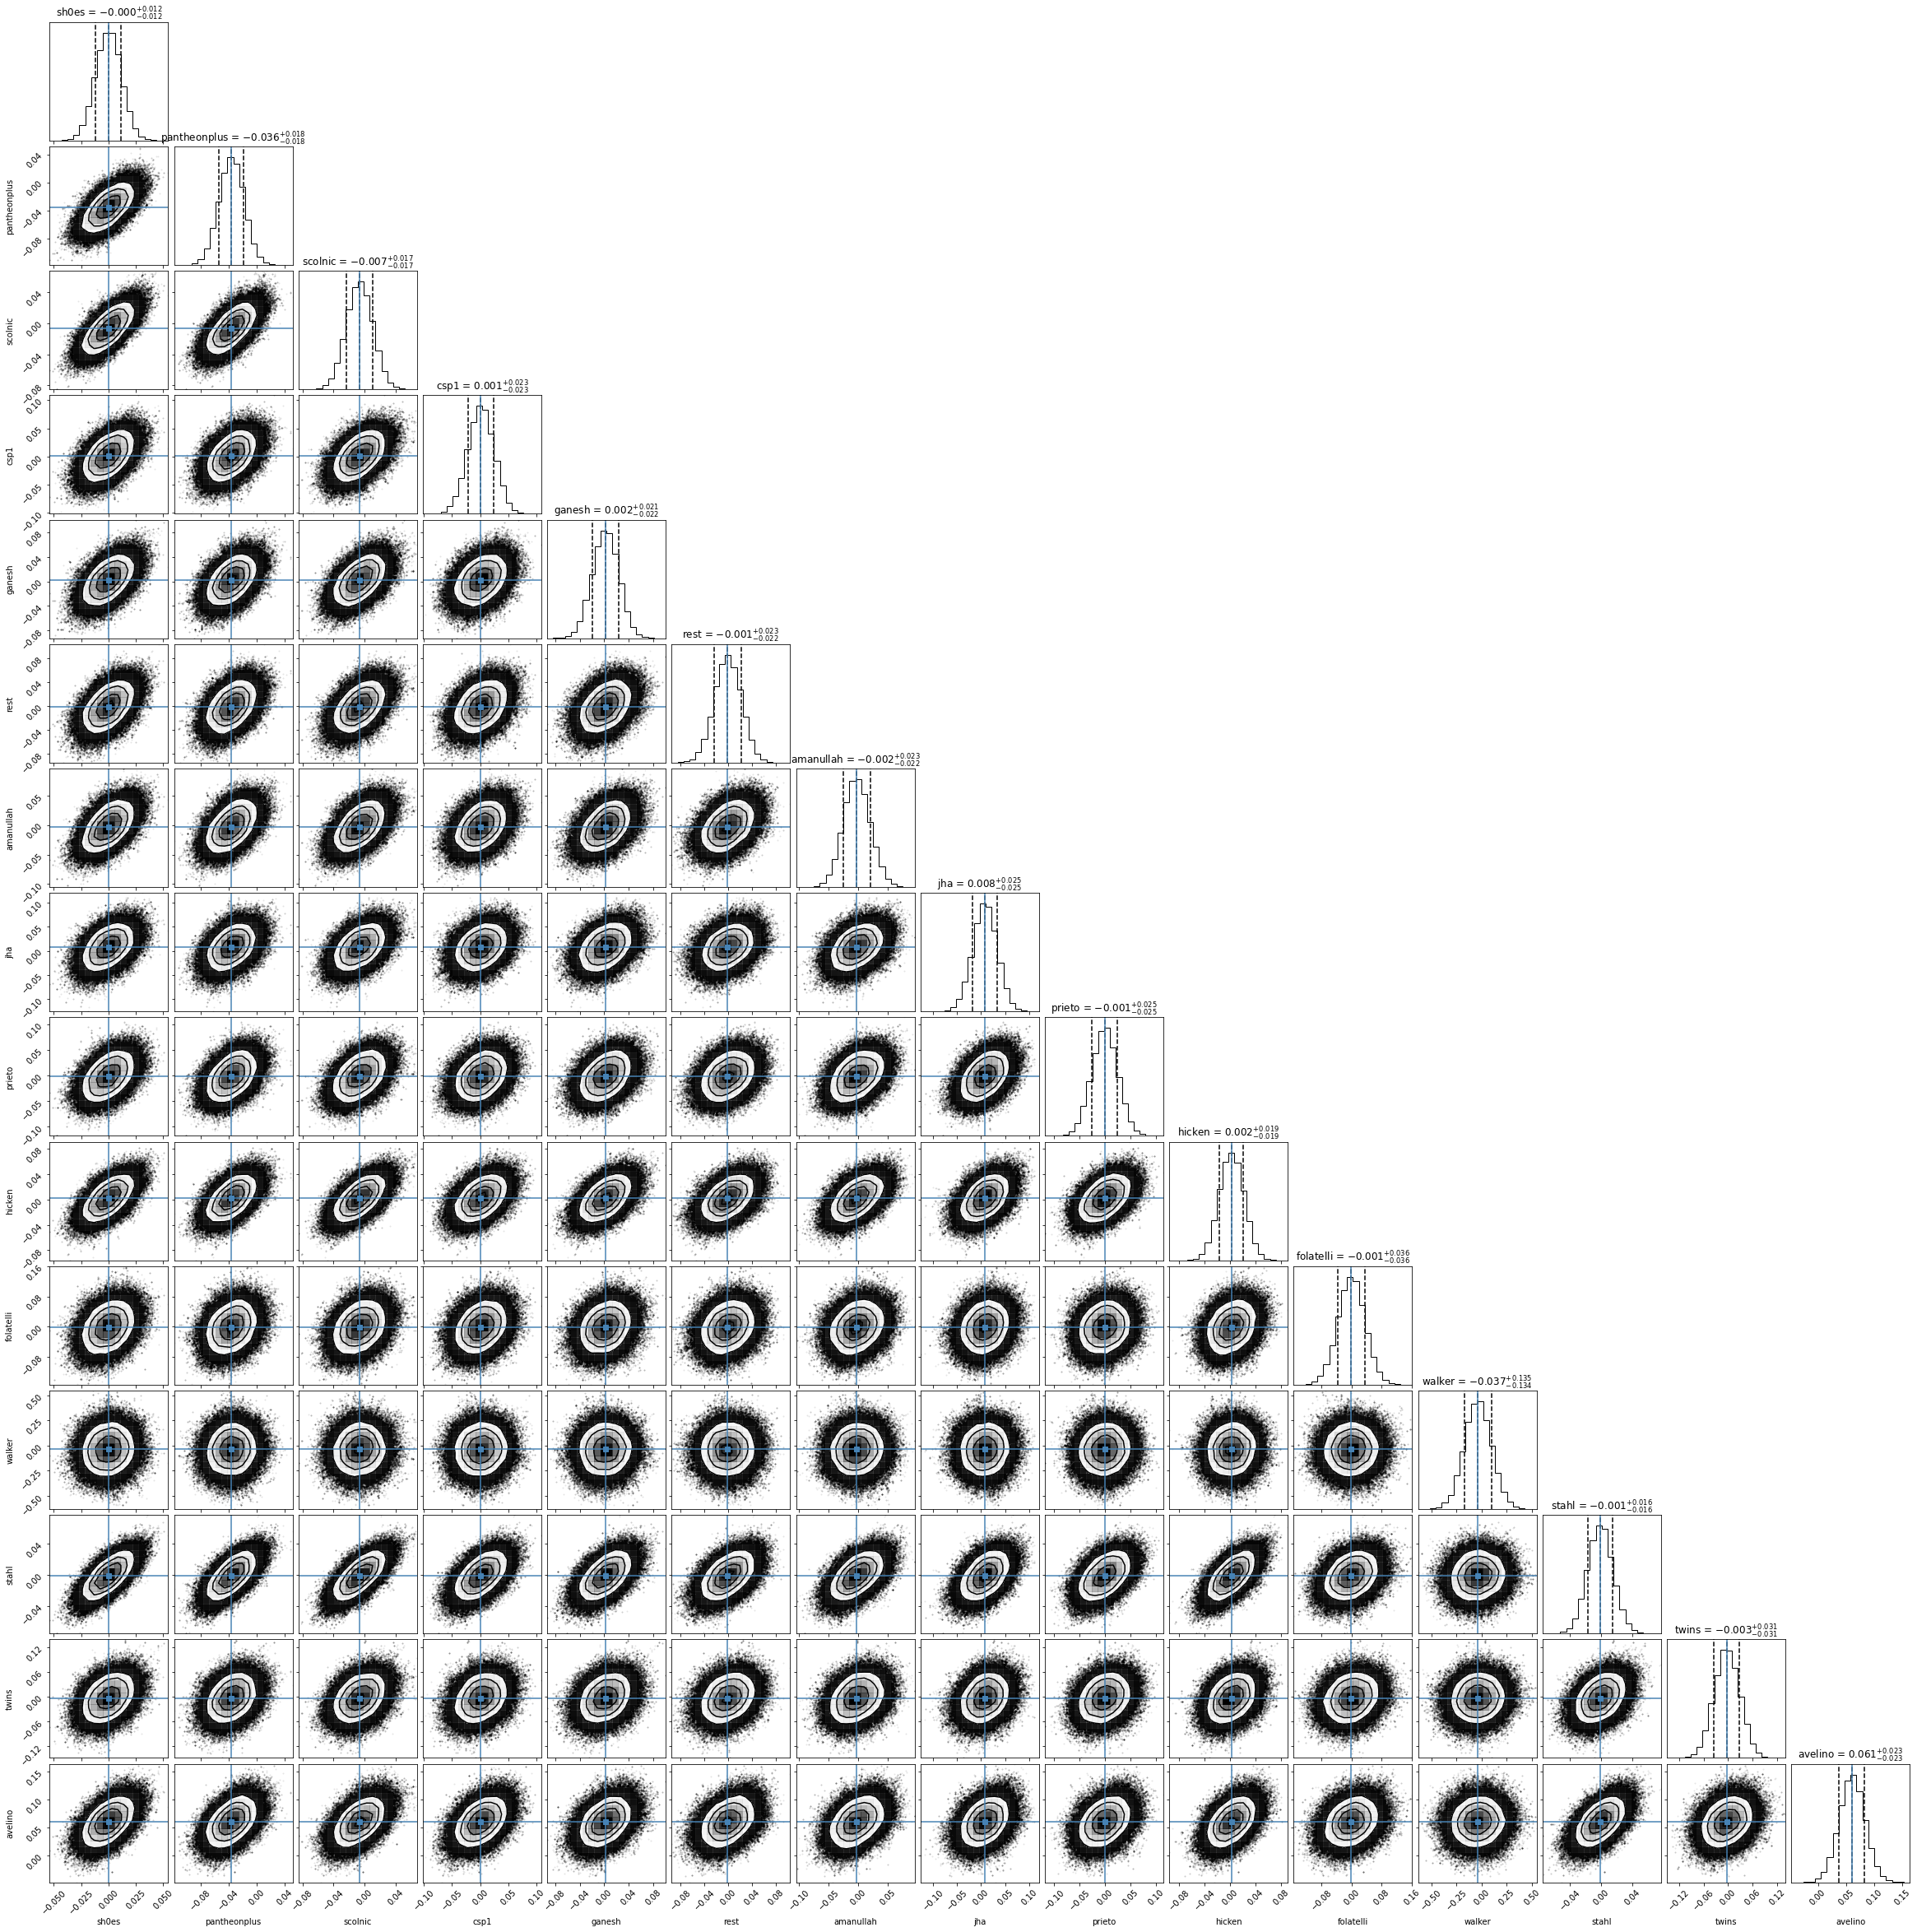

In [28]:
truths=[t[0] for t in theta]
fig = corner.corner(samples, labels=catalogs, 
                    truths=truths, 
                    quantiles=[0.16, 0.5, 0.84], 
                    show_titles=True, 
                    title_kwargs={"fontsize": 12}, 
                    title_fmt=".3f")

###########################################
t2 =  datetime.now()
print("Execution time:")
print(t2-t1)

In [29]:
npzName = "SNIa_groups.npz"
np.savez(npzName, samples)
npzfile = np.load(npzName)
print("npz attributes: ", npzfile.files)
NPZsamples = npzfile['arr_0']

npz attributes:  ['arr_0']


In [30]:
mean = np.mean(NPZsamples[:,0])

mean

-0.0002178921048652701

In [31]:
NPZsamples[:,0] -= mean

In [32]:
theta = map(lambda v: [v[1], v[2]-v[1], v[1]-v[0]],
                            zip(*np.percentile(NPZsamples, 
                            [16, 50, 84],
                            axis=0)))



theta

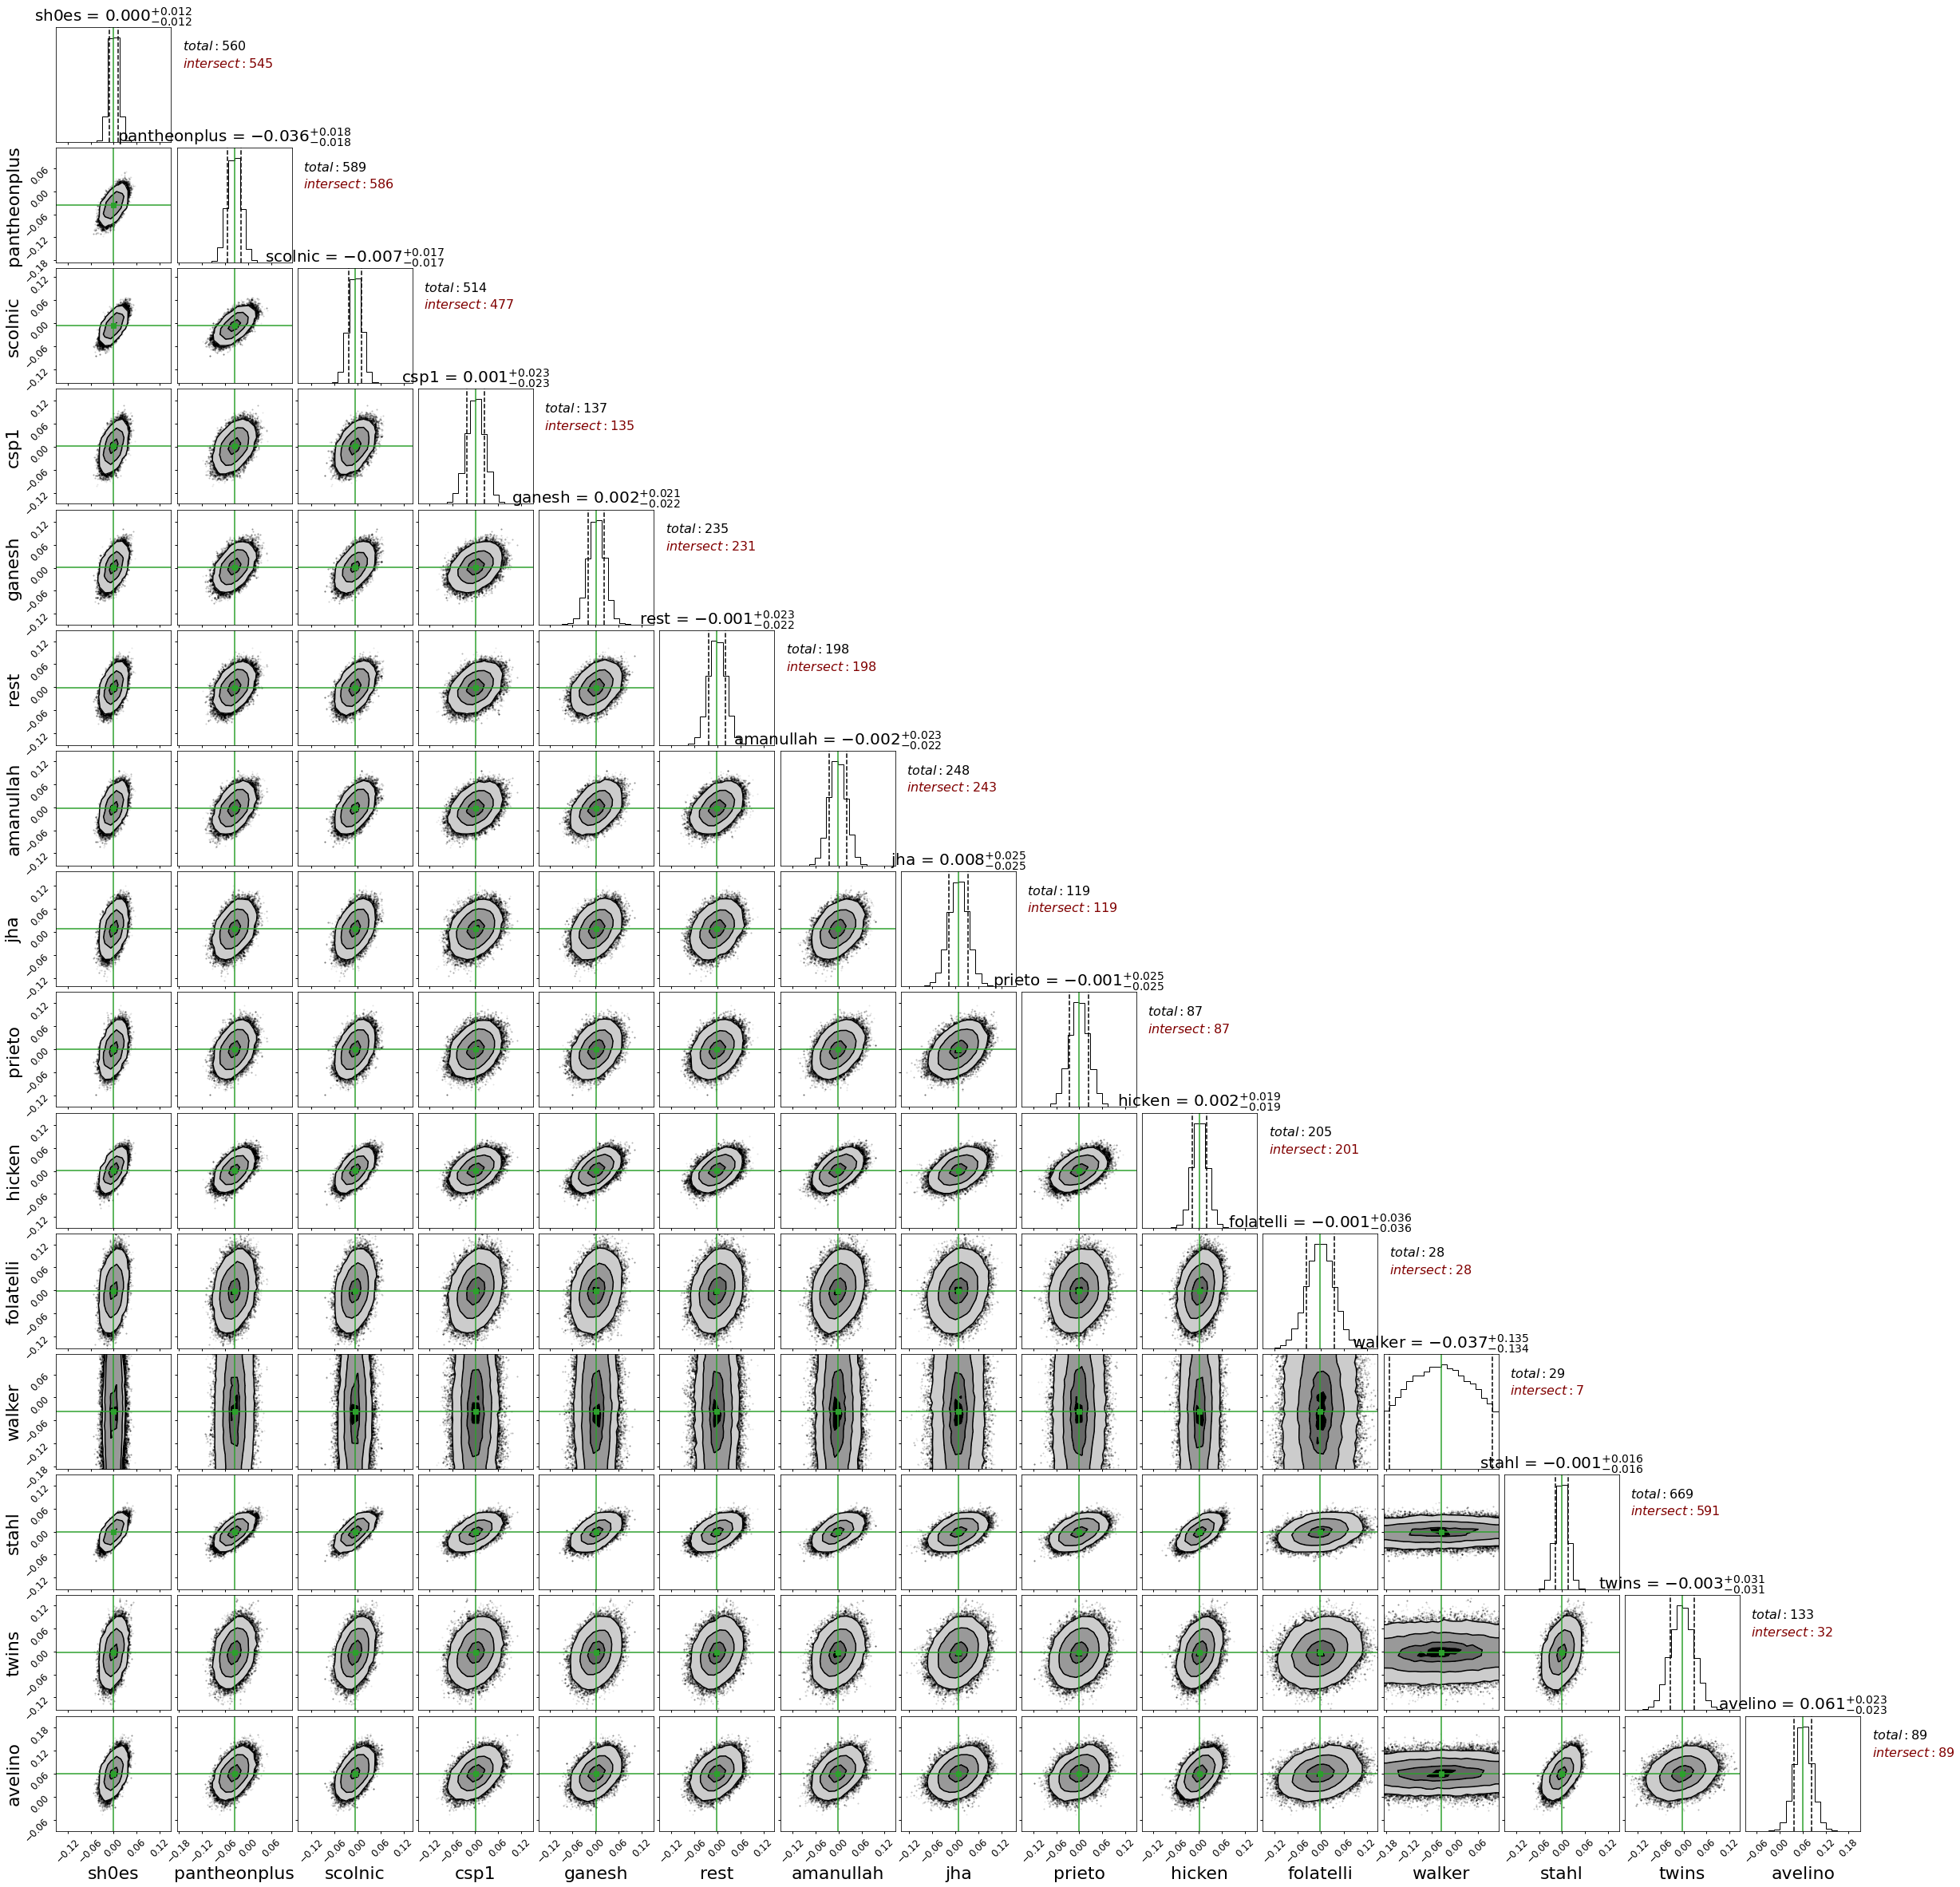

In [33]:
theta = map(lambda v: [v[1], v[2]-v[1], v[1]-v[0]],
                            zip(*np.percentile(NPZsamples, 
                            [16, 50, 84],
                            axis=0)))

truths=[t[0] for t in theta]
truths[0] = 0

# labels = ['            '+r'$\Delta\/ \mu_{'+cat+'}$' for cat in ["Pantheonplus", "Scolnic", "CSP1", "Ganesh", "Rest+", "Amanullah", "Jha", "Prieto", "Hicken", "Folatelli"]] # catalogs[1:]]

fig = corner.corner(NPZsamples, labels=catalogs, 
                    truths=truths, truth_color='#2ca02c',
                    levels=(1-np.exp(-1./8),1-np.exp(-0.5),1-np.exp(-0.5*4),1-np.exp(-0.5*9)),
                    show_titles=True, fill_contours=True, plot_density=True,
                    quantiles=[0.16, 0.84], 
                    scale_hist=False,space=0, 
                    title_kwargs={"fontsize": 20}, 
                    title_fmt=".3f",
                    range=[(t-0.15,t+0.15) for t in truths]
                   )

m = 0 
n_cat = len(catalogs)
i_cat = 0
for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=12)
    
    lbl = ax.xaxis.get_label()
    lbl.set_fontsize(22)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)
    lbl.set_linespacing(50)
    lbl = ax.yaxis.get_label()
    lbl.set_fontsize(22)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)    
    
    
    ax.tick_params(which='major', length=3, width=1., direction='out')
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = -0.1*Xlm[0]+1.1*Xlm[1]
    
    if m%(n_cat+1)==0:
        y0 = 0.2*Ylm[0]+0.80*Ylm[1]
        dx = df[['DM_'+catalogs[i_cat]]].dropna()
        ax.text(x0,y0, r"$total: $"+str(len(dx)), fontsize=16, color='k')
        
        y0 = 0.35*Ylm[0]+0.65*Ylm[1]
        other_DMs = ["DM_"+c for c in catalogs if c != catalogs[i_cat]]
        
        df["sumDM"] = df[other_DMs].sum(axis=1)
        df["sumDM"][df["sumDM"]==0] = np.nan
        
        dx = df[['sumDM', 'DM_'+catalogs[i_cat]]].dropna()       
        ax.text(x0,y0, r"$intersect: $"+str(len(dx)), fontsize=16, color='maroon')
        i_cat += 1


    m+=1

